In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import pickle
import warnings
from sklearn.feature_extraction.text import CountVectorizer

## read and describe the metadata

In [2]:
fpn_csv = 'cluster_images.csv'
data = pd.read_csv(fpn_csv, encoding='ISO-8859-1')

In [3]:
# get column names
list(data)

['s_no',
 'artist',
 'title',
 'art_movement',
 'museum_venue',
 'country_of_origin',
 'has_text',
 'primary_medium',
 'medium',
 'work_size',
 'date',
 'representation',
 'representation_semi',
 'kinetic',
 'map',
 'map2',
 'spatial_dimension',
 'spatial_dimension2',
 'pl',
 'si',
 'va',
 'te',
 'co',
 'or',
 'sh',
 'reflection',
 'po',
 'li',
 'ar',
 'notes']

In [4]:
data.head()

s_no              artist                         title art_movement  \
0     2  Giorgio de Chirico  The Uncertainty of the Poet    surrealism   
1     3    Giovanni Anselmo                     Direction  arte povera   
2     4        Milton Avery                   Yellow Sky     modernism   
3     5       Gillian Avery                  Distillation  abstraction   
4     6   Joseph (Jef) Banc          Pair-Bearing Matrix   abstraction   

  museum_venue country_of_origin  has_text primary_medium  \
0         Tate             Italy     False       painting   
1         Tate             Italy     False      sculpture   
2         Tate           America     False       painting   
3         Tate                UK     False       painting   
4         Tate            France     False       painting   

                                        medium          work_size  ... va  te  \
0                      painting, oil on canvas        106 x 94 cm  ...  3   0   
1             sculpture, fabric, glass & metal  24 x 420 x 335 cm  ...  1   3   
2                      painting, oil on canvas       156 x 184 cm  ...  2   4   
3  painting, oil, household paint on hardboard       213 x 152 cm  ...  1   2   
4              painting, mixed media on canvas         73 x 60 cm  ...  1   4   

   co  or  sh  reflection  po  li  ar  \
0   0   4   3       False   0   0   5   
1   0   3   2       False   0   0   5   
2   4   2   4       False   0   0   5   
3   0   2   4       False   0   0   5   
4   1   0   4       False   0   0   5   

                                               notes  
0  distorted perspective, shadow, signification o...  
1  hard to understand the viewpoint, sense of for...  
2  flatish, textured shapes & specific colors-lin...  
3  shapes, layers, paint handlng/texture, orienta...  
4  ambiguity through abstraction, odd shape, v te...  

[5 rows x 30 columns]

## Deciding on an exhibition curation strategy

We began by looking at the collection of images in the img_small album to narrow down the kind of exhibition we wanted to curate. We decided we wanted a mixed media exhibit consisting of a combination of photography and sharp drawings/painting. We set a target of two clusters of at least 6 coherent images each to make up the exhibit. 

## creating a subset of the columns to fit KMeans

---
**Key—**

##### variables
pl = place / si = size / va = value / te = texture / co = color / or = orientation / sh = shape / reflection 

##### plane
po = point / li = line / ar = area

------

**Note—**

We originally included all of the seven visual variables, but the silhouette plot performance seemed to increase with fewer variables.

We then added other variables, such as 'art_movement', 'primary_medium', 'medium', and 'has_text', in order to group the artwork into better clusters. Usually, these artworks are grouped into such categories—art movement and medium—within each institution that the works live in. However, because this metadata includes 400 works of fine art from museum collections and galleries across several countries and institutions, we think these "traditional" categorizations could still provide us an interesting insight into highlighting a level of certainty in uncertainty.

### In order to work with these text based variables, we're using CountVectorizer to Convert a collection of text documents to a matrix of token counts.

In [5]:
# X = data[['pl', 'si', 'va', 'te', 'co', 'or', 'sh']]
# X = data[['si', 'va', 'te', 'co', 'sh']]
# X = data[['si','co', 'sh']]
X = data[[ 'si', 'te', 'co', 'sh']]
Y = data[['primary_medium', 'art_movement', 'medium','has_text']]

In [6]:
vectorizer = CountVectorizer()
Z = vectorizer.fit_transform(Y)

In [7]:
X.head()

si  te  co  sh
0   2   0   0   3
1   3   3   0   2
2   0   4   4   4
3   3   2   0   4
4   0   4   1   4

In [8]:
Y.head()

primary_medium art_movement                                       medium  \
0       painting   surrealism                      painting, oil on canvas   
1      sculpture  arte povera             sculpture, fabric, glass & metal   
2       painting    modernism                      painting, oil on canvas   
3       painting  abstraction  painting, oil, household paint on hardboard   
4       painting  abstraction              painting, mixed media on canvas   

   has_text  
0     False  
1     False  
2     False  
3     False  
4     False

# KMeans

In [9]:
from sklearn.cluster import KMeans

## plot inertia scores by number of clusters

fitting K means to view change in Inertia:

#### 1st Attempt

Had to play around with range numbers to make sure X and Y values have the same first dimesions. Looking back, it could be because we had "distoritons.append(km.intertia_) twice? Not sure, but it took a very long time to get rid of the error code.

KMeans(n_clusters=95)


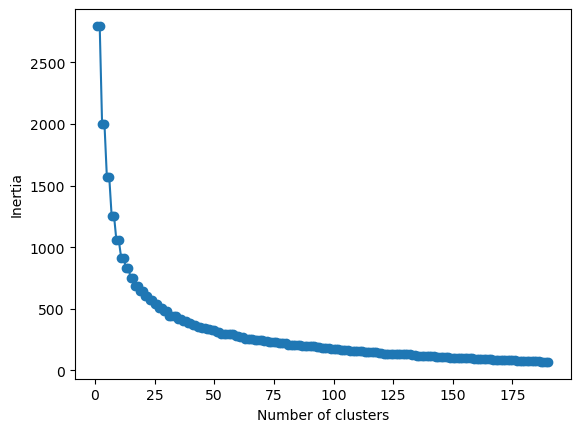

In [10]:
# container to store inertia scores over iterations
distortions = []

# fit KMeans iteratively to assess the most optimal number of clusters
for i in range(1, 96):
    km = KMeans(n_clusters=i, n_init=10)
    km.fit(X)
    distortions.append(km.inertia_)
    
    km_z = KMeans(n_clusters=1, n_init=10)
    #n_clusters 1?i?
    km_z.fit(Z)
    
    distortions.append(km.inertia_)
print(km)
    
# vizualize change in inertia
plt.plot(range(1, 191), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [11]:
print(km_z)

KMeans(n_clusters=1)


We tried this again after removing the duplicated "distortions.append(km.inertia_)" line, keeping the same range values this time. Elbow plots in both cases look similar.

KMeans(n_clusters=89)


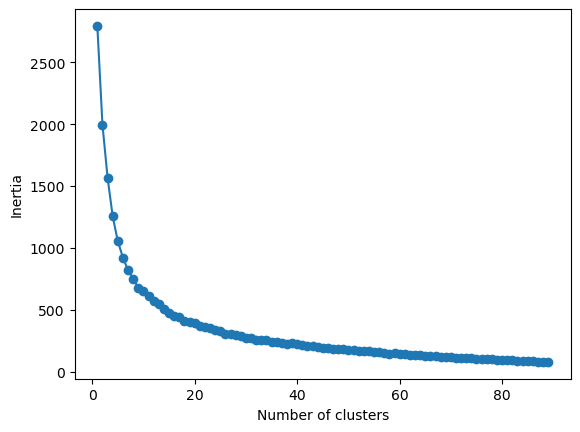

In [12]:
# container to store inertia scores over iterations
distortions = []

# fit KMeans iteratively to begin to assess the appropriate number of clusters
for i in range(1, 90):
    km = KMeans(n_clusters=i, n_init=10)
    km.fit(X)
    
    km_z = KMeans(n_clusters=1, n_init=10)
    #n_clusters 1?i?
    km_z.fit(Z)
    
    distortions.append(km.inertia_)
print(km)
    
# vizualize change in inertia
plt.plot(range(1, 90), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [13]:
print(km_z)

KMeans(n_clusters=1)


#### 2nd Attempt

The second elbow plot above shows a pretty low and clear elbow value towards about 18. To get a more accurate view, we're going decreasing the range. 

When running this, we got an error message that says: "n_samples=4 should be >= n_clusters=5" if n_clusters for km_z is above 1 or i

We tried decreasing the range, but then we kept getting error messages again saying: "X and Y values have the same first dimesions, but have shapes (#,) (#,).

A very roundabout and LONG way of showcasing that this cluster value does not work. This took over 10 minutes to run in total.

Question that we had here: Is it because n_clusters = 1 in km_z?

KMeans(n_clusters=27)


ValueError: x and y must have same first dimension, but have shapes (1209,) and (116,)

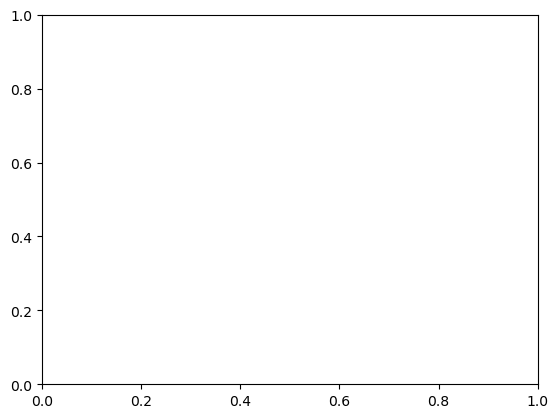

In [14]:
for i in range(1, 28):
    km = KMeans(n_clusters=i, n_init=10)
    km.fit(X)
    
    km_z = KMeans(n_clusters=1, n_init=10)
    km_z.fit(Z)
    
    distortions.append(km.inertia_)
print(km)
    
# vizualize change in inertia
plt.plot(range(1, 1210), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

But km_z = KMeans(n_clusters=i, n_init=10) results in the following error message: 

In [16]:
for i in range(1, 28):
    km = KMeans(n_clusters=i, n_init=10)
    km.fit(X)
    
    km_z = KMeans(n_clusters=i, n_init=10)
    km_z.fit(Z)
    
    distortions.append(km.inertia_)
print(km)
    
# vizualize change in inertia
plt.plot(range(1, 1210), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

ValueError: n_samples=4 should be >= n_clusters=5.

## create silhouette plots to assess various specifications for `n_clusters` in `KMeans`

Values chosen = 5, 15, 20, 55, 89, 95. 

We chose these values based on our result above in the elbow plots. When we printed print(km) above, we received values of 89 and 95. When we printed print(km_z), it consistently gave n_clusters=5. 

Also when analyzing the plots above visually, 15 or 20 seemed to be spot with a clearly visible elbow. Additionally, we also added 55 as it looks like the point where the graph begins to plateau more steadily. 

In [17]:
range_n_clusters = [5, 15, 20, 55, 89, 95]

For n_clusters = 5 The average silhouette_score is : 0.31719519384912104


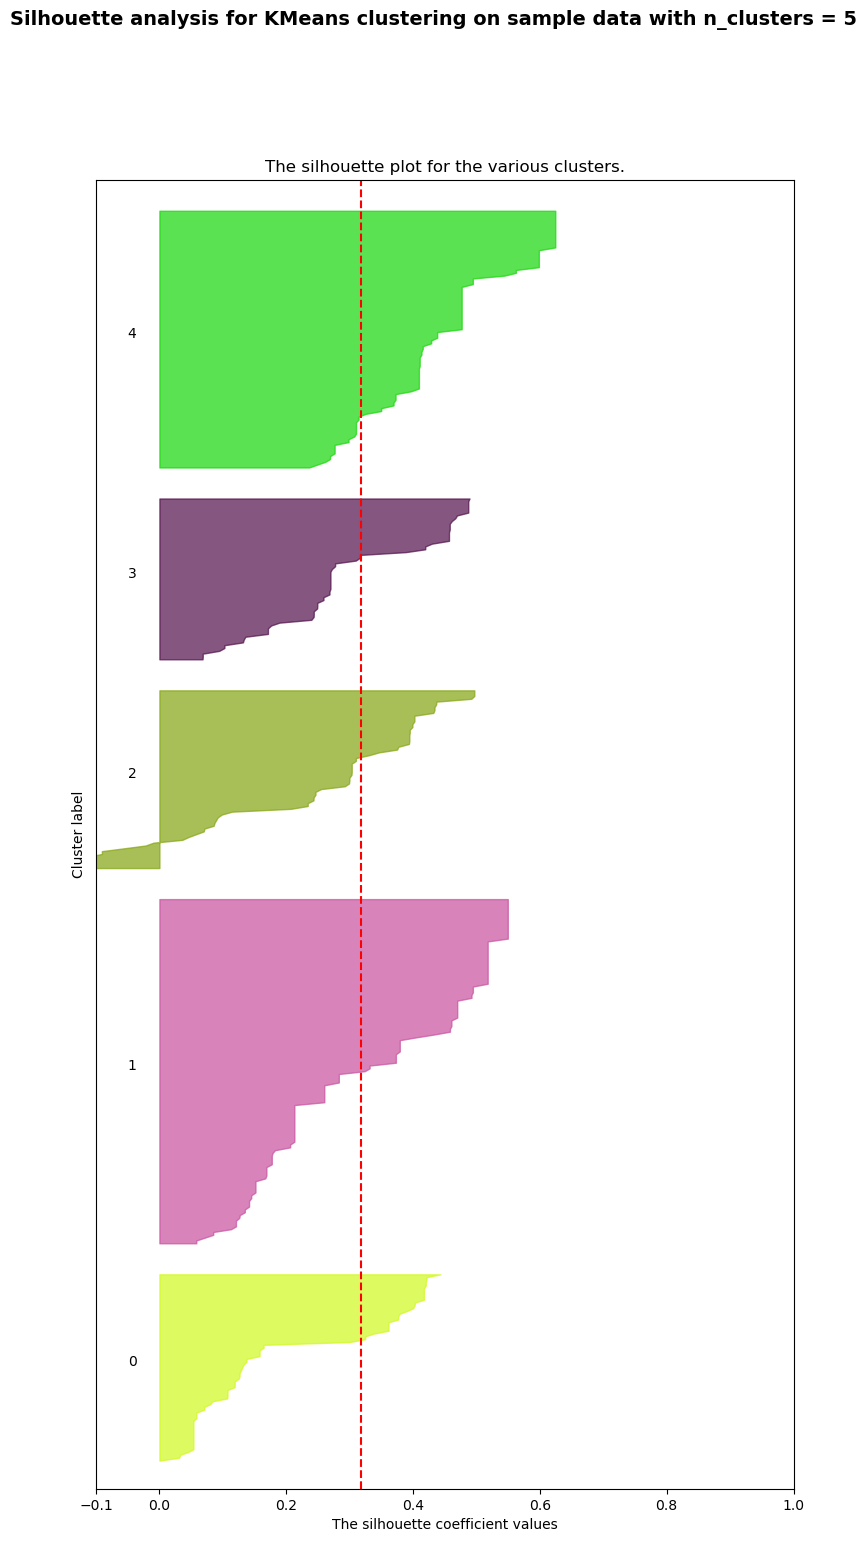

For n_clusters = 15 The average silhouette_score is : 0.31882836507299933


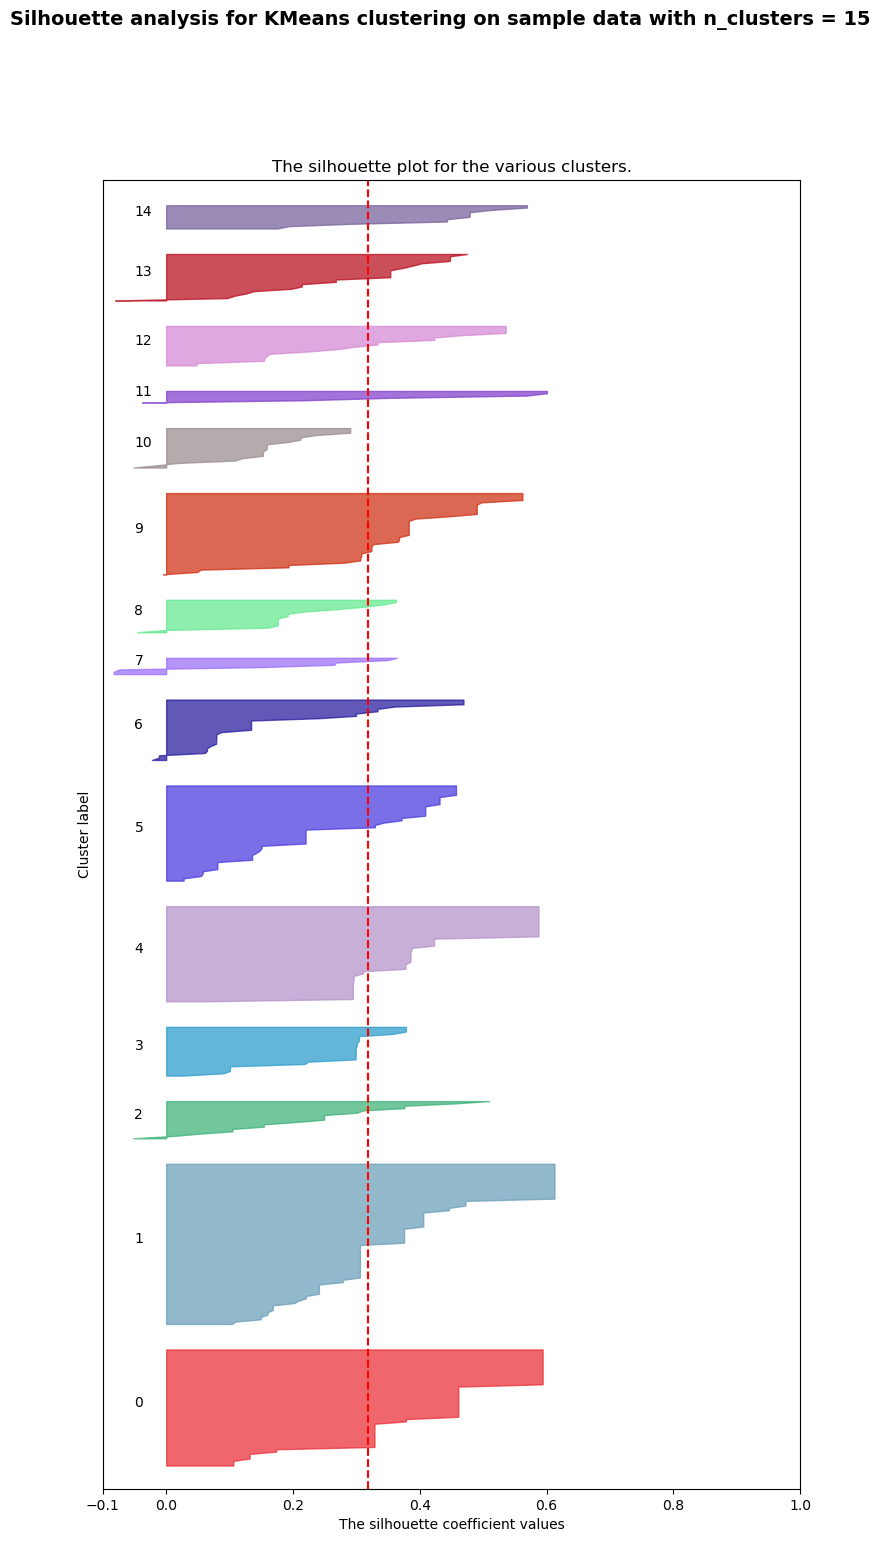

For n_clusters = 20 The average silhouette_score is : 0.32737079803799807


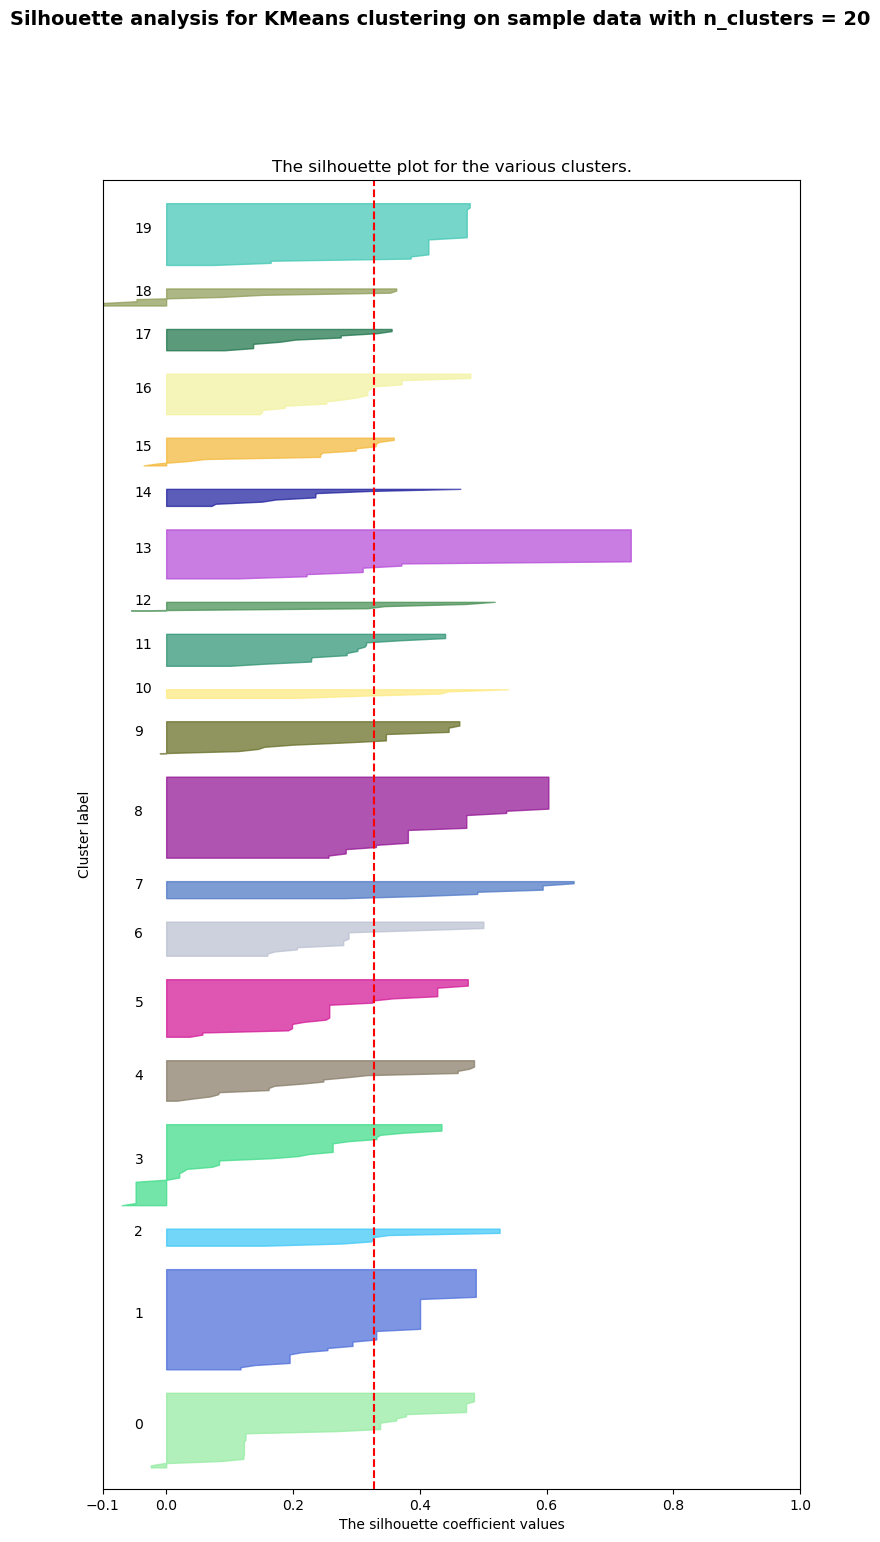

For n_clusters = 55 The average silhouette_score is : 0.466424245399706


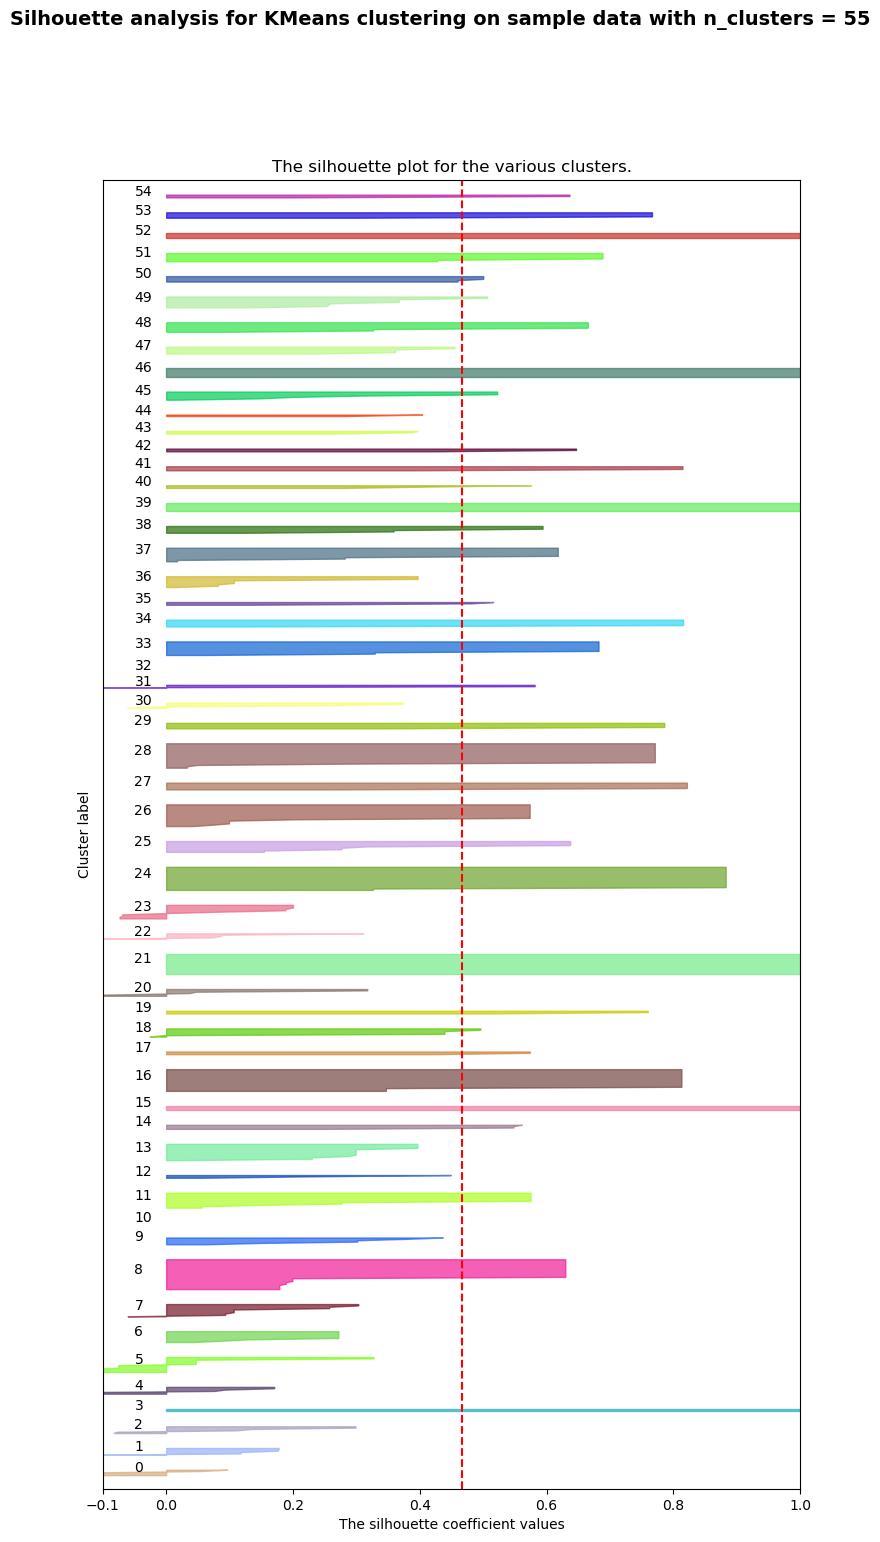

For n_clusters = 89 The average silhouette_score is : 0.6071189731000403


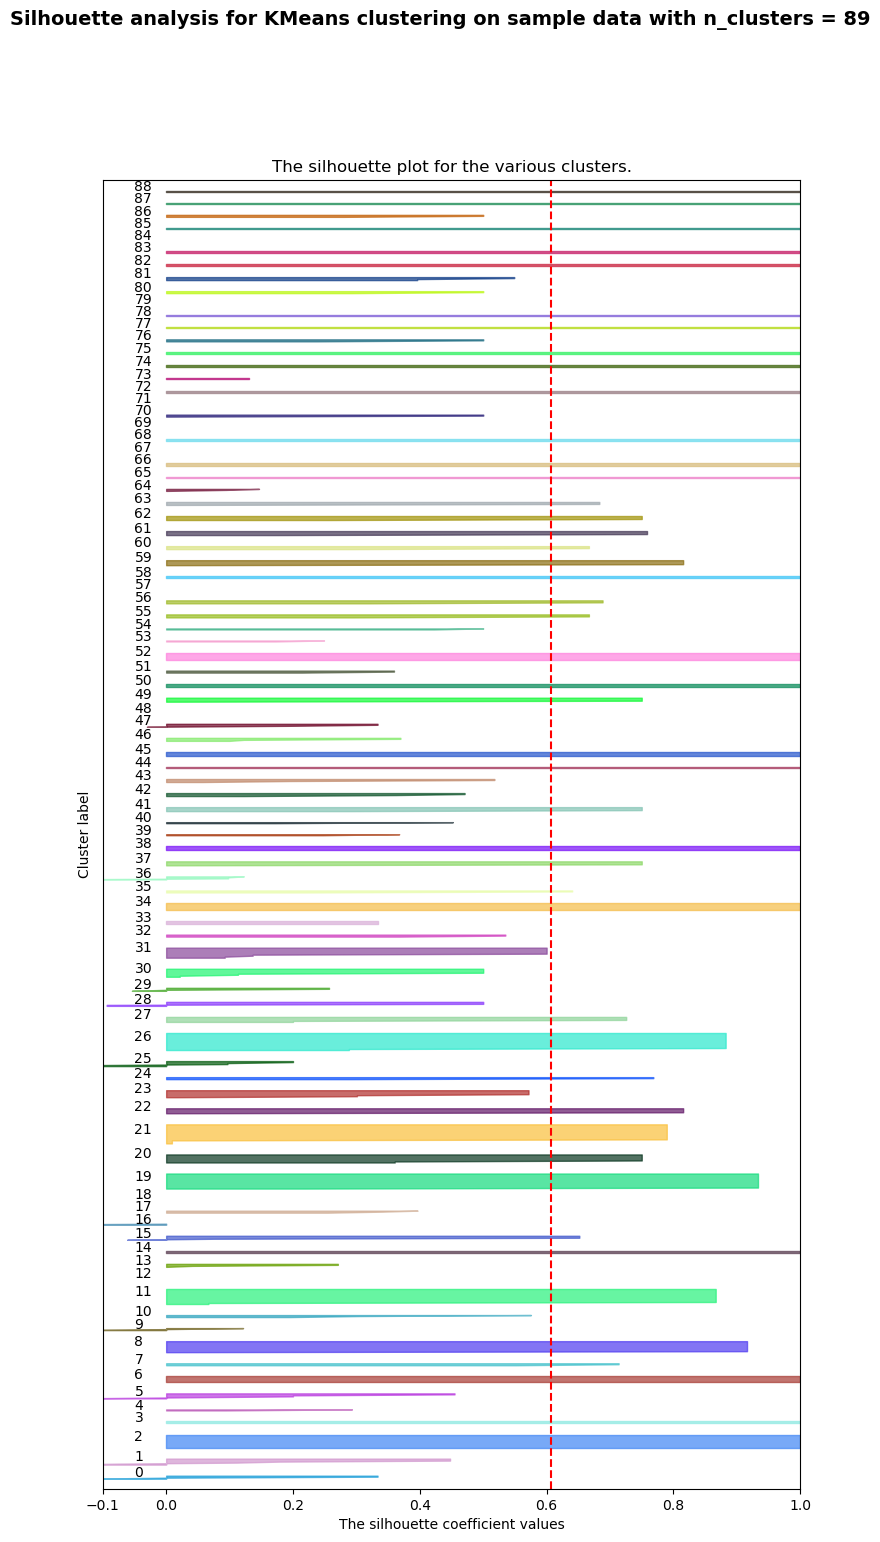

For n_clusters = 95 The average silhouette_score is : 0.6326255277400048


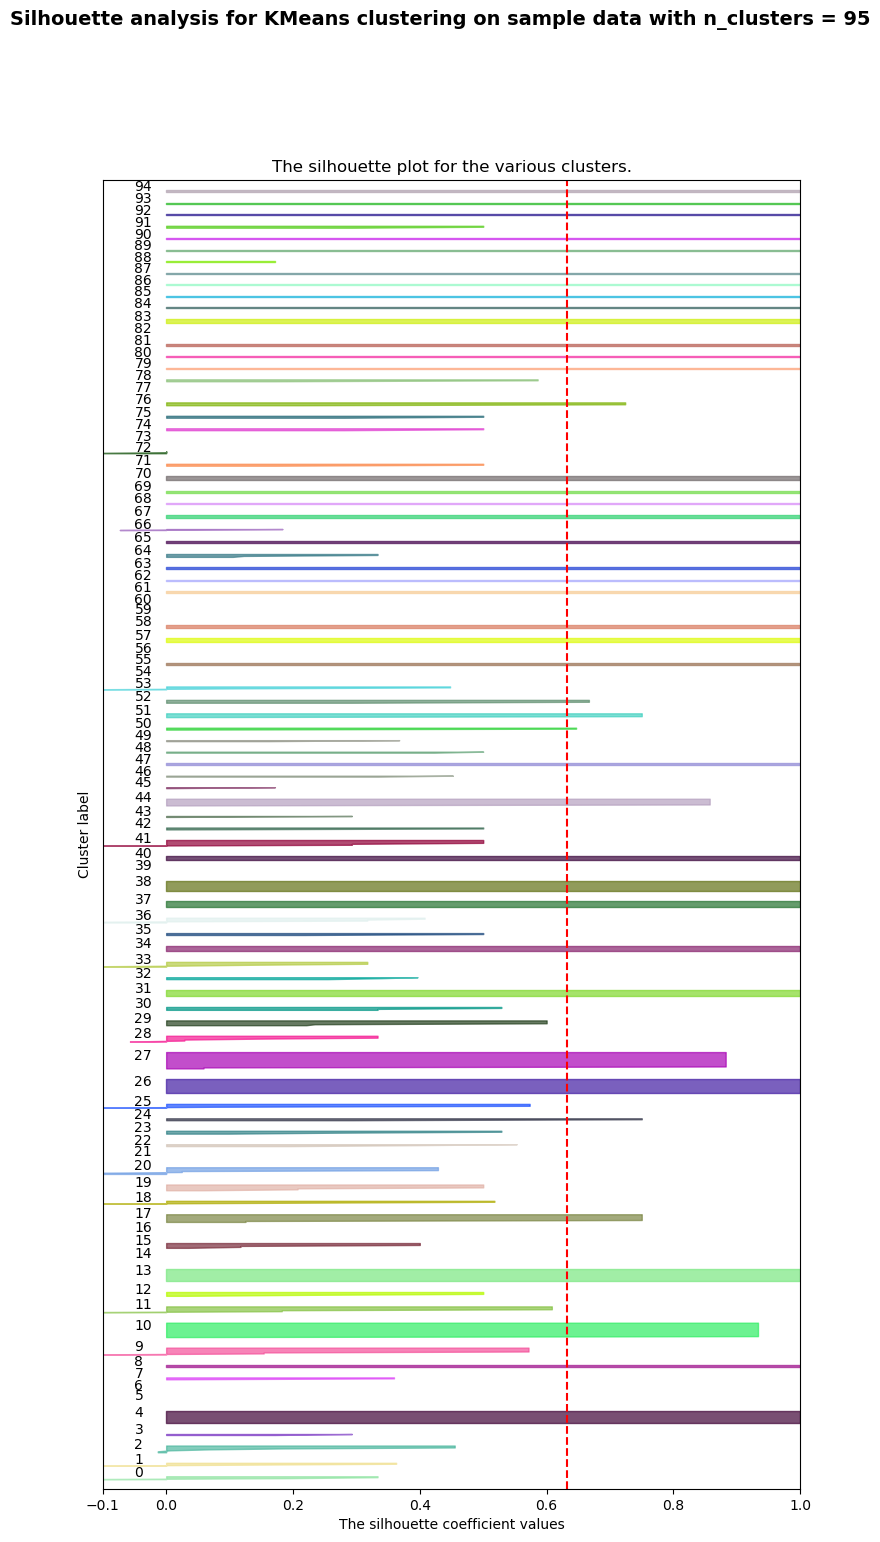

In [18]:
# modified from: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import random

for n_clusters in range_n_clusters:
    # Create a subplot
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(9, 17)

    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # select a random color for this cluster
        r = lambda: random.randint(0,255)
        color = '#%02X%02X%02X' % (r(),r(),r())
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

## As we can see from the sihouette plots, it seems like n_clusters = 20 has the most consistent looking plots with an average sihouette score of 0.45609901360935073

In [19]:
# set the number of clusters in the final model
my_n_clusters = 20

Everytime we tried to do km_z.fit(Z), we got an error message that said: "n_samples=4 should be >= n_clusters=5.
" :( So trying wihtout the km_z.fit

In [20]:
km = KMeans(n_clusters=my_n_clusters, n_init=10)
km.fit(X)
# km_z.fit(Z)

KMeans(n_clusters=20)

In [25]:
km = KMeans(n_clusters=my_n_clusters, n_init=10)
km.fit(X)
km_z.fit(Z)

ValueError: n_samples=4 should be >= n_clusters=5.

The cell down below does work.... despite the error message. 

## look at results

The key to knowing if you have chosen the right features and clusters: looking at the images in each cluster and deciding whether they seem to belong together. You could extend this starter code to display the images in this notebook, or you may decide to use Python to write an html file/files to view the images by cluster.

In [22]:
folder_path='img_small/'

In [23]:
for i in range(0, max(km.labels_)+1):
    print(" ")
    print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    print("Images in cluster: " + str(i))
    print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    for j in range(0, len(km.labels_)):
        if km.labels_[j] == i:
            img_name=str(j+2) + '_small.jpg'
            print(img_name)
            

 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 0
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
10_small.jpg
12_small.jpg
19_small.jpg
26_small.jpg
32_small.jpg
34_small.jpg
38_small.jpg
58_small.jpg
61_small.jpg
79_small.jpg
83_small.jpg
99_small.jpg
100_small.jpg
117_small.jpg
120_small.jpg
121_small.jpg
123_small.jpg
130_small.jpg
139_small.jpg
148_small.jpg
154_small.jpg
162_small.jpg
168_small.jpg
170_small.jpg
177_small.jpg
209_small.jpg
223_small.jpg
226_small.jpg
228_small.jpg
230_small.jpg
238_small.jpg
251_small.jpg
253_small.jpg
269_small.jpg
276_small.jpg
279_small.jpg
281_small.jpg
287_small.jpg
296_small.jpg
297_small.jpg
328_small.jpg
329_small.jpg
330_small.jpg
349_small.jpg
350_small.jpg
353_small.jpg
378_small.jpg
390_small.jpg
398_small.jpg
399_small.jpg
 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 1
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
30_small.jpg
151_small

/var/folders/bj/qdvcs45s25sf5wycdfp67rqc0000gn/T/ipykernel_79597/4053990964.py:19: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)


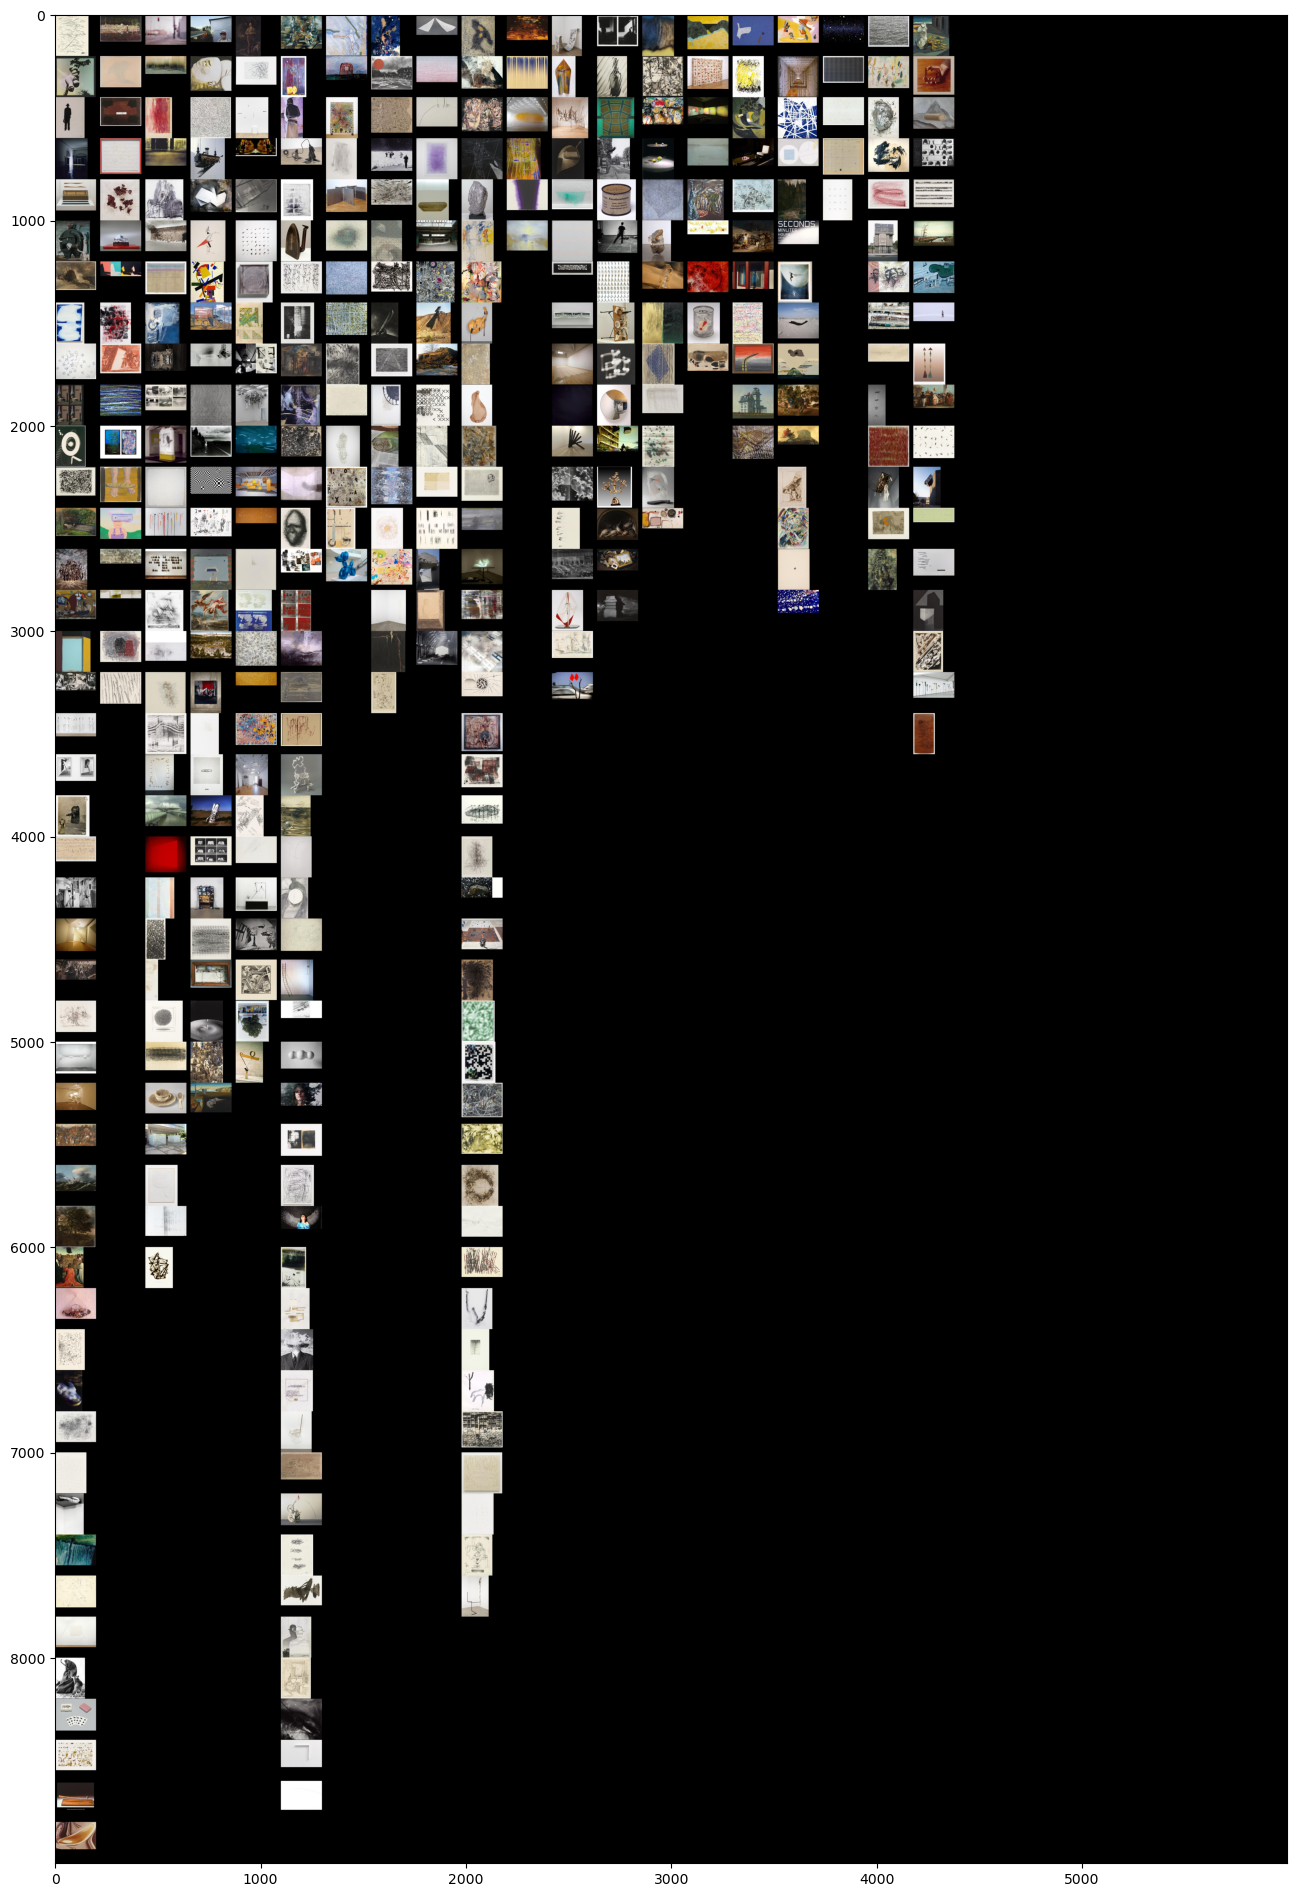

In [24]:
from PIL import Image
width = 6000
height = 9000
max_dim = 200
full_image = Image.new('RGBA', (width, height), (0, 0, 0, 255))
for i in range(0, max(km.labels_)+1):
# for i in range(0,3):
    x = i
#     for j in range(0, 3):
    counter=0
    for j in range(0, len(km.labels_)):
        if km.labels_[j] == i:
            
            y = counter
            counter+=1
            img_name=str(j+2) + '_small.jpg'
            tile = Image.open(folder_path+img_name)
            rs = max(1, tile.width/max_dim, tile.height/max_dim)
            tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
            full_image.paste(tile, (x*220, y*200), mask=tile.convert('RGBA'))

plt.figure(figsize = (32,24))
plt.imshow(full_image)

## Final Exhibition Description

After implementing our features, columns and applying count vectorizer, we found that two of our clusters showcased images that resembled German expressionism/post-war art, or followed Egon Schiele’s color scheme and grating brush strokes. At the same time, each cluster contains images with lighter pastel colors, most notably the color yellow. In color theory, yellow is associated with hope. Furthermore, in some countries, yellow ribbons of this color are worn by those who have lost someone in war. 

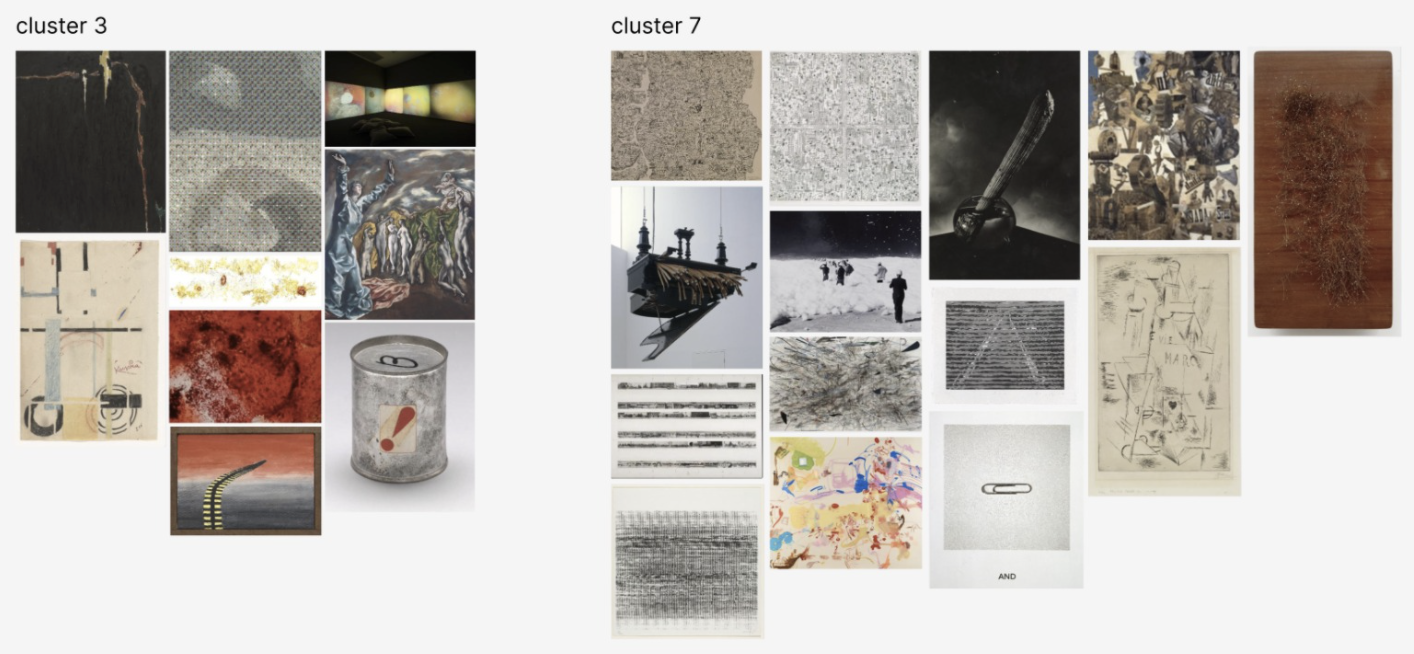

We thus present “AND”, an exhibition of 23 works about the grittiness, sorrow and darkness of war, and how resilience and hope for a peaceful future guide us through these difficult times. The poster for the exhibition is the photo of the polaroid of a paper clip stamped with “AND”,  suggesting the delicate balance between these two opposing forces.

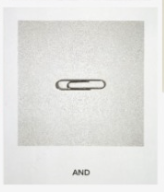

The clusters are showcased in one big exhibition space as opposed to two rooms, with the two physical pieces (the tin can and the hanging object) placed in the center of the room. The drawings and charcoal-toned pieces make up the majority of the exhibition, while the red/brown pieces and lighter pastel-colored pieces frame the show. The exhibit opens on the lined road, flanked by the two images of lines below the hanging object in cluster 7. These indicate the path into war and the growing frenzy that accompanies it. 

As we move further into the exhibit, the grey tonality bleeds into brown and then red paintings that hint at the bloodshed and doom of conflict. As you near the end of the exhibit, the artworks begin to be interspersed by the lighter pastel-colored works. 

The final artwork is showcased solo against a large white wall: the pastel painting in cluster 7 (304_small.jpg). This prompts viewers to leave the exhibition thinking about the cross-pollination of all the imagery they have just witnessed, framed in a hopeful tonality. 

To heighten this, viewers exit the exhibit through the room with what look like either pastel projections or paintings shown at the top right of cluster 3. Here, they are able to relax on pillows in the center of the room to process the difficult and serious subject matter they were confronted with. 

#### Note

We noticed that each time we rerun the code, the clusters change slightly, even though we're not changing any of the features or variables. We chose the 2 clusters (clusters 3 and 7) pictured above and listed below to make up our exhibition.

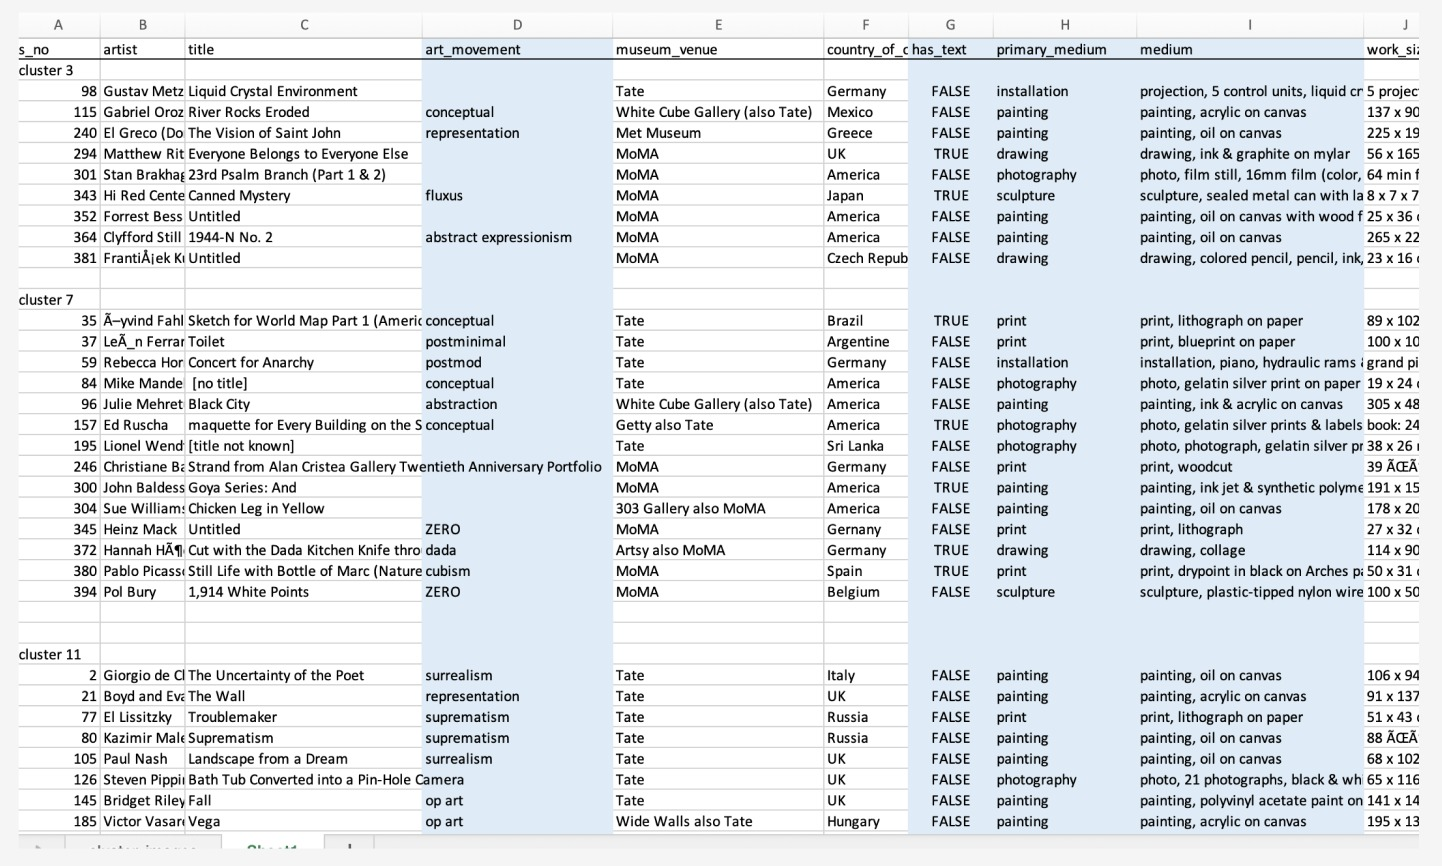